In [1]:
# Import the Necessary Library 
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,Conv2D,Flatten,Dense,Activation,MaxPooling2D
from keras import backend as k
import cv2

**Step-1 Load the Dataset**

In [2]:
#Load The Dataset
fashion_mnist = keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

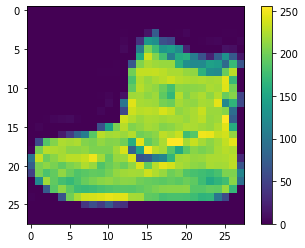

In [4]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)
plt.show()

**Step-2-Examine the size and dimension of image**

In [5]:
print(x_train.shape)
print('Initial shape or dimension of x_train ',str(x_train.shape))
print("Number of samples in our training data:" +str(len(x_train)))
print("Number of labels in our training data:" +str(len(y_train)))
print("Number of samples in our training data:" +str(len(x_test)))
print("Number of samples in our training data:" +str(len(y_test)))
print("    ")
print("Dimensions of x_train:" + str(x_train[0].shape))
#print("labels of x_train:" + str(y_train.shape))
print("   ")
print("Dimensions of x_test:" + str(x_test[0].shape))
#print("labels of x_test:" + str(y_test.shape))

(60000, 28, 28)
Initial shape or dimension of x_train  (60000, 28, 28)
Number of samples in our training data:60000
Number of labels in our training data:60000
Number of samples in our training data:10000
Number of samples in our training data:10000
    
Dimensions of x_train:(28, 28)
   
Dimensions of x_test:(28, 28)


**Step-3-Looking at the some images from the dataset**

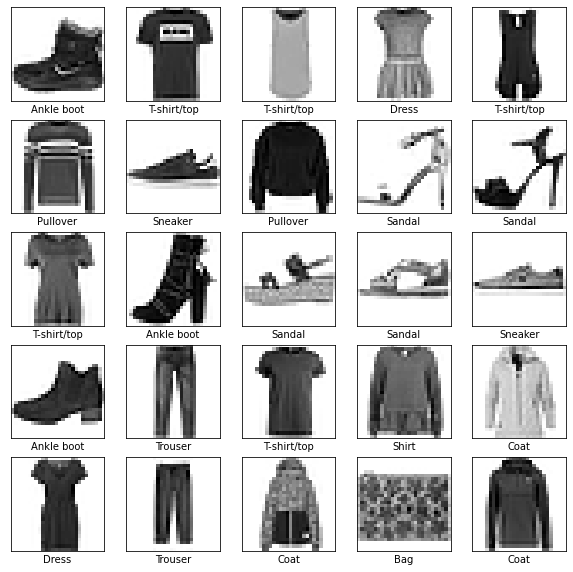

In [6]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.show()

**Step-4 Preparing Our Dataset For Training**

In [7]:
#Let Store the number rows and columns 
img_rows=x_train[0].shape[0]
img_cols=x_train[0].shape[1]

In [8]:
#Assign the input_shape value
input_shape=(img_rows,img_cols,1)

In [9]:
#Get the dataset in the right shape wee t to reshape it 
x_train=x_train.reshape(x_train.shape[0],img_rows,img_cols,1)
x_test=x_test.reshape(x_test.shape[0],img_rows,img_cols,1)

In [10]:
#Change our image type into the float32 type 
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

In [11]:
#Normalize the data by changing the range from (0,255) to (0,1)
x_train/=255
x_test/=255

In [12]:
print('x_train,shape:',x_train.shape)
print(x_train.shape[0],'train_samples')
print(x_test.shape[0],'test_samples')

x_train,shape: (60000, 28, 28, 1)
60000 train_samples
10000 test_samples


**Step-5 One Hot-Encoding To Our Label(y)**



In [13]:
from keras.utils import np_utils
#Now We One Hot Encode the ouput 
y_train=np_utils.to_categorical(y_train)
y_test=np_utils.to_categorical(y_test)
#Lets Count the number of column to our one hot encoding matrix 
print('Number of Classes:' + str(y_test.shape[1]))
num_classes=y_test.shape[1]
num_pixels=x_train.shape[1]*x_train.shape[2]

Number of Classes:10


In [14]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

**Step-6 Creating Our Model**

In [15]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

**Step-7-Ploting Our Model**

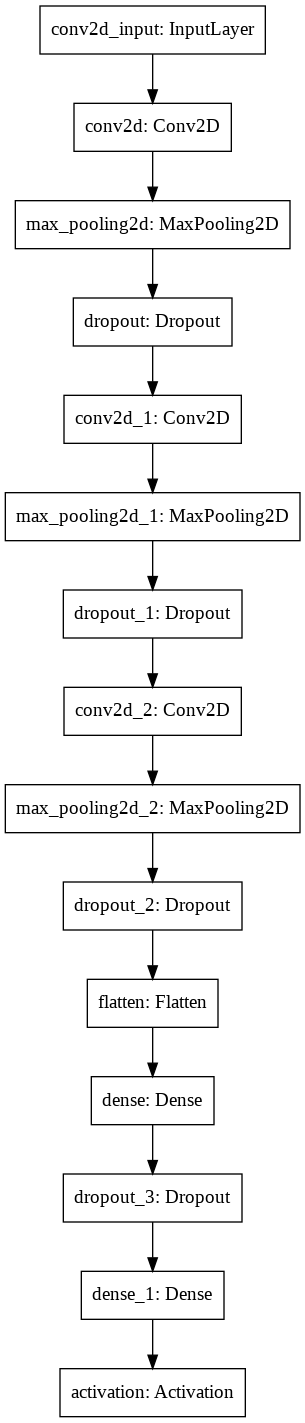

In [16]:
import keras
import tensorflow as tf
tf.keras.utils.plot_model(model,to_file="my_model.png")

**Step-8-Training Our Model**

In [17]:
batch_size=32
epochs=15
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test,y_test))
score=model.evaluate(x_test,y_test,verbose=0)
print('Test Loss',score[0])
print('Test Accurcacy',score[1])

Epoch 1/15
1875/1875 [==============================] - 61s 32ms/step - loss: 1.3790 - accuracy: 0.4737 - val_loss: 0.6257 - val_accuracy: 0.7654
Epoch 2/15
1875/1875 [==============================] - 59s 32ms/step - loss: 0.7397 - accuracy: 0.7281 - val_loss: 0.5622 - val_accuracy: 0.7867
Epoch 3/15
1875/1875 [==============================] - 59s 32ms/step - loss: 0.6719 - accuracy: 0.7553 - val_loss: 0.5106 - val_accuracy: 0.8135
Epoch 4/15
1875/1875 [==============================] - 59s 32ms/step - loss: 0.6267 - accuracy: 0.7733 - val_loss: 0.4885 - val_accuracy: 0.8196
Epoch 5/15
1875/1875 [==============================] - 58s 31ms/step - loss: 0.5980 - accuracy: 0.7819 - val_loss: 0.4750 - val_accuracy: 0.8256
Epoch 6/15
1875/1875 [==============================] - 58s 31ms/step - loss: 0.5790 - accuracy: 0.7901 - val_loss: 0.4631 - val_accuracy: 0.8326
Epoch 7/15
1875/1875 [==============================] - 59s 31ms/step - loss: 0.5672 - accuracy: 0.7961 - val_loss: 0.4559 -

**Step-9-Ploting Our Loss And Accuracy Chart**

<function matplotlib.pyplot.show>

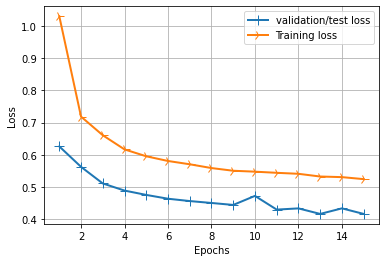

In [18]:
import matplotlib.pyplot as plt
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values=history_dict['val_loss']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_loss_values,label='validation/test loss')
line2=plt.plot(epochs,loss_values,label='Training loss')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show

<function matplotlib.pyplot.show>

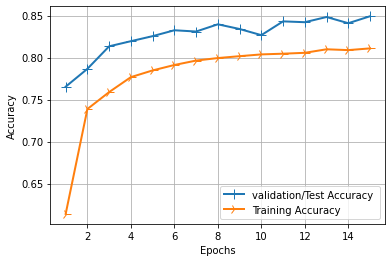

In [19]:
import matplotlib.pyplot as plt
history_dict=history.history
acc_values=history_dict['accuracy']
val_acc_values=history_dict['val_accuracy']
epochs=range(1,len(loss_values)+1)
line1=plt.plot(epochs,val_acc_values,label='validation/Test Accuracy ')
line2=plt.plot(epochs,acc_values,label='Training Accuracy')
plt.setp(line1,linewidth=2.0,marker='+',markersize=10.0)
plt.setp(line2,linewidth=2.0,marker='4',markersize=10.0)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show

In [20]:
history.history

{'accuracy': [0.6139000058174133,
  0.7388166785240173,
  0.7590000033378601,
  0.7767999768257141,
  0.7847833037376404,
  0.7912499904632568,
  0.7965166568756104,
  0.7995166778564453,
  0.8017333149909973,
  0.8038666844367981,
  0.8047000169754028,
  0.8057500123977661,
  0.8099499940872192,
  0.8089666962623596,
  0.8110166788101196],
 'loss': [1.030194640159607,
  0.7182506322860718,
  0.6603915095329285,
  0.6163992285728455,
  0.5950202941894531,
  0.5804169178009033,
  0.5701924562454224,
  0.5584253072738647,
  0.5500761866569519,
  0.547212541103363,
  0.5436626672744751,
  0.5405853986740112,
  0.5321523547172546,
  0.5302615761756897,
  0.5240513682365417],
 'val_accuracy': [0.7653999924659729,
  0.7867000102996826,
  0.8134999871253967,
  0.819599986076355,
  0.8256000280380249,
  0.8325999975204468,
  0.8310999870300293,
  0.8396999835968018,
  0.8341000080108643,
  0.8267999887466431,
  0.8432000279426575,
  0.842199981212616,
  0.8483999967575073,
  0.8410000205039978

**Step-10-Saving The Model**

In [21]:
model.save('Mnist-Fashion.h5')
print('model save')

model save


**Step-11-Lets The model on Test Data**

In [22]:
plt.figure(figsize=(20,10))
# initialize our list of output images
images = []

<Figure size 1440x720 with 0 Axes>

In [23]:
from keras import backend as K
# randomly select a few testing fashion items
for i in np.random.choice(np.arange(0, len(y_test)), size=(16,)):
	# classify the clothing
	probs = model.predict(x_test[np.newaxis, i])
	prediction = probs.argmax(axis=1)
	label = class_names[prediction[0]]
 
	# extract the image from the testData if using "channels_first"
	# ordering
	if K.image_data_format() == "channels_first":
		image = (x_test[i][0] * 255).astype("uint8")
 
	# otherwise we are using "channels_last" ordering
	else:
		image = (x_test[i] * 255).astype("uint8")

	# initialize the text label color as green (correct)
	color = (0, 255, 0)

	# otherwise, the class label prediction is incorrect
	if prediction[0] != np.argmax(y_test[i]):
		color = (0, 0, 255)

	# merge the channels into one image and resize the image from
	# 28x28 to 96x96 so we can better see it and then draw the
	# predicted label on the image
	image = cv2.merge([image] * 3)
	image = cv2.resize(image, (96, 96), interpolation=cv2.INTER_LINEAR)
	cv2.putText(image, label, (5, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.75,
		(0, 255, 0), 2)

	# add the image to our list of output images
	images.append(image)

In [24]:
from imutils import build_montages

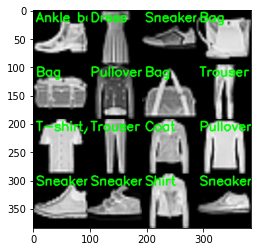

In [25]:
# construct the montage for the images
montage = build_montages(images, (96, 96), (4, 4))[0]
# show the output montage
# cv2.imshow("Fashion MNIST", montage)
# cv2.waitKey(0)
plt.imshow(montage, cmap='gray')
plt.show()